<a href="https://colab.research.google.com/github/AmauriCJr/Codigos-Aleatorios/blob/master/Aula15_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from   matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [22]:
tf.__version__

'2.9.2'

In [23]:
def generate_cloud_examples(n):
    n1 = round(n / 2.0)
    n2 = n - n1
    M1 = (np.random.randn(n1, 2) * 0.7) + 1
    t1 = np.ones(shape = [n1,])
    M2 = (np.random.randn(n2, 2) * 0.7) - 1
    t2 = -np.ones(shape = [n2,])
    M = np.ndarray(shape = [n, 2])
    t = np.ndarray(shape = [n,])
    M[0 : n1, 0 : 2] = M1
    M[n1 : M.shape[0], 0 : 2] = M2
    t[0 : n1,] = t1
    t[n1 : t.shape[0],] = t2
    return M, t

In [24]:
def non_linear_separable_cloudpoints(n_train):
    x = np.zeros(shape = (n_train, 2)) + np.random.randn(n_train, 2) * 0.6

    # Testando para parábola (x**2) - 0.5 
    # --> Vai criar um conjunto de dados desbalanceado por causa da distribuição normal
    x_p = x[np.where([x[n,1] >= x[n,0]**2 - 0.5 for n in range(0, x.shape[0])])[0]]
    x_p = x_p + np.random.randn(x_p.shape[0], x_p.shape[1]) * 0.1
    x_n = x[np.where([x[n,1] < x[n,0]**2 - 0.5 for n in range(0, x.shape[0])])[0]]
    x_n = x_n + np.random.randn(x_n.shape[0], x_n.shape[1]) * 0.1

    return x_p, x_n

In [25]:
def plot_cloudplot(x, labels):
    plt.figure(figsize=(10,8))
    for n in range (0, x.shape[0]):
        c0 = x[n, 0]
        c1 = x[n, 1]
        if labels[n] == 1:
            plt.plot(c0, c1, '+r')
        else:
            plt.scatter(c0, c1, facecolors='none', edgecolors='b')
    plt.xlabel('c_0')
    plt.ylabel('c_1', rotation = 0.0)
    # plt.rcParams['figure.dpi'] = 300
    plt.grid()
    plt.show()

In [26]:
def labels2activationmatrix(t, possible_labels):
    samples = t.shape[0]
    number_labels = len(possible_labels)
    y = np.zeros(shape = [samples, number_labels])
    for k in range(0, number_labels):
        L = possible_labels[k]
        v = [t[i] == L for i in range(0, len(t))]
        n = np.where(v)
        y[n[0], k] = 1
    return y

In [27]:
def activationmatrix2labels(y, possible_labels):
    samples = y.shape[0]
    t = np.zeros(shape = [samples,])
    for k in range(0, t.shape[0]):
        M = max(y[k, :])
        v = [y[k, i] == M for i in range(0, y.shape[1])]
        v = np.where(v)
        v = v[0]
        try:
            v = v[0]
        except:
            pass
        t[k] = possible_labels[v]
    return t

In [28]:
def create_cnn_model():
    c = models.Sequential()
    c.add(layers.Conv1D(filters = 4, kernel_size = 1, activation = 'relu', input_shape = [2, 1]))
    # c.add(layers.Conv2D(filters = 4, kernel_size = [5 5], activation='relu', input_shape = [200, 200, 1]))
    c.add(layers.MaxPooling1D(1))
    # c.add(layers.MaxPooling1D([2 2]))
    c.add(layers.Conv1D(filters = 8, kernel_size = 1, activation='relu'))
    c.add(layers.MaxPooling1D(1))
    c.add(layers.Flatten())
    c.add(layers.Dense(2, activation='softmax'))
    c.summary()
    c.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return c
    

In [29]:
def train_cnn_model(x, labels):
    history = c.fit(x, labels2activationmatrix(labels, [-1, 1]), \
    batch_size = 100, epochs = 200, verbose = 2, validation_split = 0.3)
    # Training history visualization
    plt.plot(history.history['accuracy'], label = 'Training', linewidth = 1.2)
    plt.plot(history.history['val_accuracy'], label = 'Validation', linewidth = 1.2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc="upper left")
    plt.show()
    plt.plot(history.history['loss'], label = 'Training', linewidth = 1.2)
    plt.plot(history.history['val_loss'], label = 'Validation', linewidth = 1.2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss function')
    plt.legend(loc="upper left")
    plt.show()
    return c

In [34]:
def generate_confusion_matrix(results, labels):
    confusion_matrix =  np.zeros(shape = (2, 2))
    for n in range(0, len(results)):
        if labels[n] == -1:
            if results[n] == -1:
               confusion_matrix[0,0] += 1
            if results[n] == 1:
               confusion_matrix[0,1] += 1
        if labels[n] == 1:
            if results[n] == -1:
               confusion_matrix[1,0] += 1
            if results[n] == 1:
               confusion_matrix[1,1] += 1
    return confusion_matrix
    

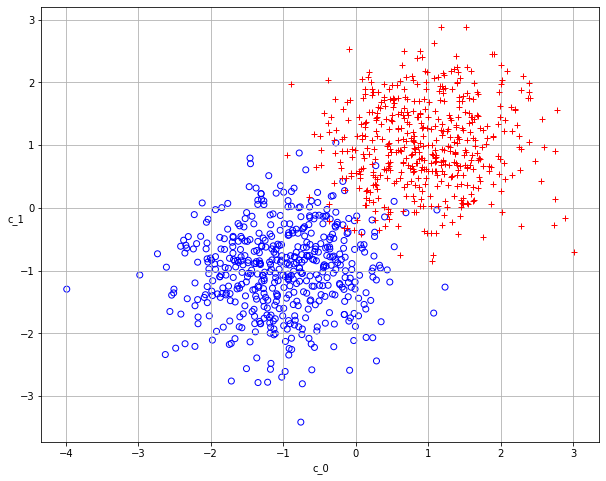

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2, 4)              8         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 4)             0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 8)              40        
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 2, 8)             0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                

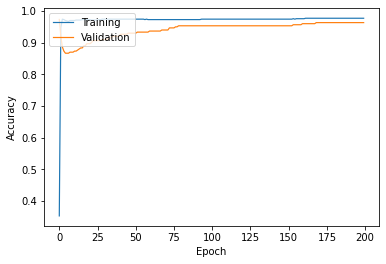

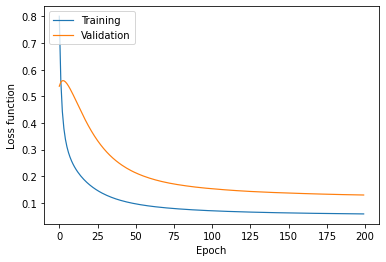

1/1 [==============================] - 0s 82ms/step
[-1.  1.  1. -1.]


In [31]:
if __name__ == '__main__':
    '''
    x_p, x_n = non_linear_separable_cloudpoints(6000)
    if x_p.shape[0] > x_n.shape[0]:
        x_p = x_p[: x_n.shape[0], :]
    else:
        if x_n.shape[0] > x_p.shape[0]:
            x_n = x_n[: x_p.shape[0], :]
    labels_p = np.zeros(shape = (x_p.shape[0], ))
    labels_n = np.zeros(shape = (x_n.shape[0], ))
    labels_p[:, ] =  1
    labels_n[:, ] = -1
    x = np.zeros(shape = (x_p.shape[0] + x_n.shape[0], 2))
    labels = np.zeros(shape = (labels_p.shape[0] + labels_n.shape[0], ))
    x[: x_p.shape[0], :] = x_p
    x[x_p.shape[0] :, :] = x_n
    labels[: labels_p.shape[0], ] = labels_p
    labels[labels_p.shape[0] :, ] = labels_n
    print(labels_n.shape[0])
    print(labels_p.shape[0])
    '''
    x, labels = generate_cloud_examples(1000)
    plot_cloudplot(x, labels)
    c = create_cnn_model()
    c = train_cnn_model(x, labels)
    results = c.predict([[-1, -1], [1, 1], [1.2, 1.5], [-1.2, -1.1]])
    results = activationmatrix2labels(results, [-1, 1])
    print(results)

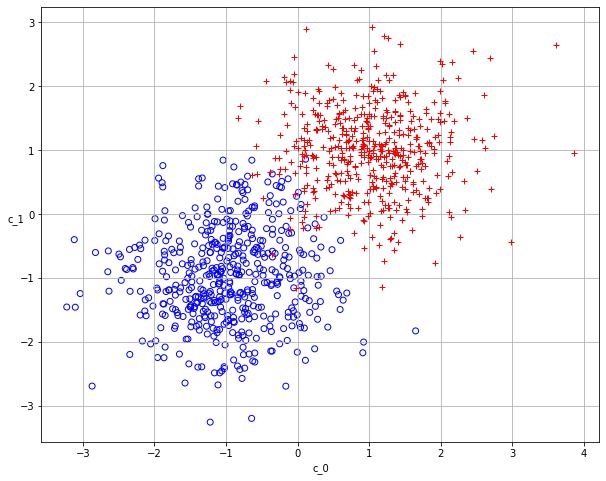

32/32 [==============================] - 0s 1ms/step
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [35]:
if __name__ == '__main__':
    x_test, labels_test = generate_cloud_examples(1000)
    plot_cloudplot(x_test, labels_test)
    results = c.predict(x_test)
    results = activationmatrix2labels(results, [-1, 1])
    print(results)

    M = generate_confusion_matrix(results, labels)

    print(M)